# Geometry Visualization and Validation

Load, visualize, and validate the GHS_UCDB shapefile geometry before uploading to GEE.

In [16]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point, Polygon
import os
import warnings
warnings.filterwarnings('ignore')

print('✅ Libraries imported successfully')

# Set up matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

✅ Libraries imported successfully


## 1. Load Original Shapefile

In [17]:
# Path to the shapefile
shapefile_path = "/Users/martynclark/Library/CloudStorage/OneDrive-WorldMeteorologicalOrganization(WMO-OMM)/Global Heat Resilience Service/04 Data/GHS_UCDB_GLOBE_R2024_V1_0/GHS_UCDB_THEME_HAZARD_RISK_GLOBE_R2024A.shp"

print(f"📖 Loading shapefile...")
print(f"   Path: {os.path.basename(shapefile_path)}")

try:
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)
    
    print(f"✅ Shapefile loaded successfully!")
    print(f"   📊 Shape: {gdf.shape} (rows, columns)")
    print(f"   🗺️ CRS: {gdf.crs}")
    print(f"   📐 Geometry types: {gdf.geometry.geom_type.unique()}")
    print(f"   📏 File size: {os.path.getsize(shapefile_path) / (1024*1024):.1f} MB")
    
except Exception as e:
    print(f"❌ Error loading shapefile: {e}")
    gdf = None

📖 Loading shapefile...
   Path: GHS_UCDB_THEME_HAZARD_RISK_GLOBE_R2024A.shp
✅ Shapefile loaded successfully!
   📊 Shape: (11422, 120) (rows, columns)
   🗺️ CRS: PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","54009"]]
   📐 Geometry types: ['Polygon' 'MultiPolygon']
   📏 File size: 5.0 MB


## 2. Basic Data Inspection

In [23]:
#print field list
print(gdf.head())

   fid  ID_UC_G0  GC_UCN_MAI        GC_CNT_GAD  GC_UCA_KM2    GC_POP_TOT  \
0  1.0       1.0        Apia             Samoa        35.0   60041.65661   
1  2.0       2.0  Nuku'alofa             Tonga        20.0   51990.76620   
2  3.0       3.0   Ewa Beach     United States        15.0   53720.65818   
3  4.0       4.0     Papeete  French Polynesia        50.0  109747.12570   
4  5.0       5.0    Rosarito            México        29.0   76707.05999   

     GC_DEV_WIG                       GC_DEV_USR  HZ_WLF_BHA  HZ_WLF_B_1  ...  \
0  Lower Middle                          Oceania         0.0         0.0  ...   
1  Upper Middle                          Oceania         0.0         0.0  ...   
2   High income                 Northern America         0.0         0.0  ...   
3   High income                          Oceania         0.0         0.0  ...   
4  Upper Middle  Latin America and the Caribbean         0.0         0.0  ...   

   HZ_CEV_D_2  HZ_CEV_C_2  HZ_CEV_F_2  HZ_CEV_T_7  HZ_CE

In [24]:
if gdf is not None:
    print("📋 Dataset Overview:")
    print(f"   Total features: {len(gdf):,}")
    print(f"   Total columns: {len(gdf.columns)}")
    
    # Show key columns we need
    key_columns = ['GC_UCN_MAI', 'GC_CNT_GAD', 'GC_POP_TOT', 'GC_UCA_KM2']
    
    print("\n🔍 Key columns:")
    for col in key_columns:
        if col in gdf.columns:
            non_null = gdf[col].notna().sum()
            print(f"   ✅ {col}: {non_null:,}/{len(gdf):,} non-null values")
        else:
            print(f"   ❌ {col}: Missing")
    
    # Show memory usage
    memory_mb = gdf.memory_usage(deep=True).sum() / (1024 * 1024)
    print(f"\n💾 Memory usage: {memory_mb:.1f} MB")
    
    # Show coordinate bounds
    bounds = gdf.total_bounds
    print(f"\n📐 Geographic bounds:")
    print(f"   Longitude: {bounds[0]:.6f} to {bounds[2]:.6f}")
    print(f"   Latitude: {bounds[1]:.6f} to {bounds[3]:.6f}")
    
else:
    print("❌ Cannot inspect data - shapefile not loaded")

📋 Dataset Overview:
   Total features: 11,422
   Total columns: 120

🔍 Key columns:
   ✅ GC_UCN_MAI: 11,408/11,422 non-null values
   ✅ GC_CNT_GAD: 11,422/11,422 non-null values
   ✅ GC_POP_TOT: 11,422/11,422 non-null values
   ✅ GC_UCA_KM2: 11,422/11,422 non-null values

💾 Memory usage: 13.2 MB

📐 Geographic bounds:
   Longitude: -16912000.000000 to 17342000.000000
   Latitude: -6370000.000000 to 7750000.000000


In [25]:
if gdf is not None:
    print("📋 Dataset Overview:")
    print(f"   Total features: {len(gdf):,}")
    print(f"   Total columns: {len(gdf.columns)}")
    
    # Show key columns we need
    key_columns = ['GC_UCN_MAI', 'GC_CNT_GAD', 'GC_POP_TOT', 'GC_UCA_KM2']
    
    print("\n🔍 Key columns:")
    for col in key_columns:
        if col in gdf.columns:
            non_null = gdf[col].notna().sum()
            print(f"   ✅ {col}: {non_null:,}/{len(gdf):,} non-null values")
        else:
            print(f"   ❌ {col}: Missing")
    
    # Show memory usage
    memory_mb = gdf.memory_usage(deep=True).sum() / (1024 * 1024)
    print(f"\n💾 Memory usage: {memory_mb:.1f} MB")
    
    # Show coordinate bounds
    bounds = gdf.total_bounds
    print(f"\n📐 Geographic bounds:")
    print(f"   Longitude: {bounds[0]:.6f} to {bounds[2]:.6f}")
    print(f"   Latitude: {bounds[1]:.6f} to {bounds[3]:.6f}")
    
else:
    print("❌ Cannot inspect data - shapefile not loaded")

📋 Dataset Overview:
   Total features: 11,422
   Total columns: 120

🔍 Key columns:
   ✅ GC_UCN_MAI: 11,408/11,422 non-null values
   ✅ GC_CNT_GAD: 11,422/11,422 non-null values
   ✅ GC_POP_TOT: 11,422/11,422 non-null values
   ✅ GC_UCA_KM2: 11,422/11,422 non-null values

💾 Memory usage: 13.2 MB

📐 Geographic bounds:
   Longitude: -16912000.000000 to 17342000.000000
   Latitude: -6370000.000000 to 7750000.000000


## 3. Geometry Validation

In [26]:
if gdf is not None:
    print("🔍 Geometry Validation:")
    
    # Check geometry validity
    valid_mask = gdf.geometry.is_valid
    valid_count = valid_mask.sum()
    invalid_count = len(gdf) - valid_count
    
    print(f"   ✅ Valid geometries: {valid_count:,} ({valid_count/len(gdf)*100:.1f}%)")
    print(f"   ❌ Invalid geometries: {invalid_count:,} ({invalid_count/len(gdf)*100:.1f}%)")
    
    # Check for empty geometries
    empty_mask = gdf.geometry.is_empty
    empty_count = empty_mask.sum()
    print(f"   🔳 Empty geometries: {empty_count:,} ({empty_count/len(gdf)*100:.1f}%)")
    
    # Check for null geometries
    null_mask = gdf.geometry.isna()
    null_count = null_mask.sum()
    print(f"   ⚫ Null geometries: {null_count:,} ({null_count/len(gdf)*100:.1f}%)")
    
    # Show geometry type distribution
    geom_types = gdf.geometry.geom_type.value_counts()
    print(f"\n📐 Geometry type distribution:")
    for geom_type, count in geom_types.items():
        print(f"   {geom_type}: {count:,} ({count/len(gdf)*100:.1f}%)")
    
    # If there are invalid geometries, show some examples
    if invalid_count > 0:
        print(f"\n🔍 Sample invalid geometries:")
        invalid_sample = gdf[~valid_mask].head(3)
        
        for idx, row in invalid_sample.iterrows():
            city_name = row.get('GC_UCN_MAI_2025', 'Unknown')
            country = row.get('GC_CNT_GAD_2025', 'Unknown')
            geom_type = row.geometry.geom_type if row.geometry else 'None'
            print(f"   Row {idx}: {city_name}, {country} - {geom_type}")
            
            # Try to get validation error
            try:
                from shapely.validation import explain_validity
                if row.geometry:
                    explanation = explain_validity(row.geometry)
                    print(f"     Issue: {explanation}")
            except:
                print(f"     Issue: Cannot determine specific problem")
    
else:
    print("❌ Cannot validate geometries - shapefile not loaded")

🔍 Geometry Validation:
   ✅ Valid geometries: 11,400 (99.8%)
   ❌ Invalid geometries: 22 (0.2%)
   🔳 Empty geometries: 0 (0.0%)
   ⚫ Null geometries: 0 (0.0%)

📐 Geometry type distribution:
   Polygon: 11,414 (99.9%)
   MultiPolygon: 8 (0.1%)

🔍 Sample invalid geometries:
   Row 97: Unknown, Unknown - Polygon
     Issue: Ring Self-intersection[1615000 6824000]
   Row 227: Unknown, Unknown - Polygon
     Issue: Ring Self-intersection[-800000 4640000]
   Row 253: Unknown, Unknown - Polygon
     Issue: Ring Self-intersection[1187000 3983000]


## 4. Focus on Brazilian Cities

In [27]:
if gdf is not None:
    print("🇧🇷 Analyzing Brazilian Cities:")
    
    # Filter for Brazil
    if 'GC_CNT_GAD' in gdf.columns:
        brazil_gdf = gdf[gdf['GC_CNT_GAD'] == 'Brazil'].copy()
        print(f"   Found {len(brazil_gdf):,} Brazilian cities")
        
        if len(brazil_gdf) > 0:
            # Analyze Brazilian city geometries
            brazil_valid = brazil_gdf.geometry.is_valid.sum()
            brazil_invalid = len(brazil_gdf) - brazil_valid
            brazil_empty = brazil_gdf.geometry.is_empty.sum()
            
            print(f"   ✅ Valid: {brazil_valid:,} ({brazil_valid/len(brazil_gdf)*100:.1f}%)")
            print(f"   ❌ Invalid: {brazil_invalid:,} ({brazil_invalid/len(brazil_gdf)*100:.1f}%)")
            print(f"   🔳 Empty: {brazil_empty:,} ({brazil_empty/len(brazil_gdf)*100:.1f}%)")
            
            # Show largest Brazilian cities by population
            if 'GC_POP_TOT' in brazil_gdf.columns and 'GC_UCN_MAI' in brazil_gdf.columns:
                print(f"\n🏙️ Largest Brazilian cities:")
                
                # Sort by population and show top 10
                brazil_sorted = brazil_gdf.sort_values('GC_POP_TOT', ascending=False).head(10)
                
                for idx, (_, city) in enumerate(brazil_sorted.iterrows()):
                    name = city.get('GC_UCN_MAI', 'Unknown')
                    pop = city.get('GC_POP_TOT', 0)
                    area = city.get('GC_UCA_KM2', 0)
                    
                    # Check geometry validity
                    geom_status = "✅" if city.geometry and city.geometry.is_valid else "❌"
                    
                    print(f"   {idx+1:2d}. {name}: {pop:,.0f} people, {area:.0f} km² {geom_status}")
                    
                    # Try to calculate centroid
                    if city.geometry and city.geometry.is_valid and not city.geometry.is_empty:
                        try:
                            centroid = city.geometry.centroid
                            print(f"       Centroid: ({centroid.y:.4f}, {centroid.x:.4f})")
                        except Exception as e:
                            print(f"       Centroid: Error calculating - {e}")
                    else:
                        print(f"       Centroid: Cannot calculate (invalid/empty geometry)")
            
        else:
            print("   ❌ No Brazilian cities found")
    else:
        print("   ❌ Country column not found")
        
else:
    print("❌ Cannot analyze Brazilian cities - shapefile not loaded")

🇧🇷 Analyzing Brazilian Cities:
   Found 366 Brazilian cities
   ✅ Valid: 365 (99.7%)
   ❌ Invalid: 1 (0.3%)
   🔳 Empty: 0 (0.0%)

🏙️ Largest Brazilian cities:
    1. São Paulo: 19,485,158 people, 2111 km² ✅
       Centroid: (-2883410.9427, -4425104.9266)
    2. Rio de Janeiro: 9,853,693 people, 1285 km² ✅
       Centroid: (-2795106.2257, -4134850.1946)
    3. Belo Horizonte: 4,376,747 people, 609 km² ✅
       Centroid: (-2441624.7947, -4246109.1954)
    4. Recife: 3,847,558 people, 491 km² ✅
       Centroid: (-992573.3198, -3478970.4684)
    5. Fortaleza: 3,324,149 people, 413 km² ✅
       Centroid: (-468015.7385, -3859308.7167)
    6. Salvador: 3,305,396 people, 323 km² ✅
       Centroid: (-1592744.5820, -3790326.6254)
    7. Porto Alegre: 2,763,350 people, 599 km² ✅
       Centroid: (-3644161.1018, -4688122.7045)
    8. Curitiba: 2,512,877 people, 566 km² ✅
       Centroid: (-3107213.7809, -4634238.5159)
    9. Goiânia: 2,457,483 people, 531 km² ✅
       Centroid: (-2054484.9341, -48

## 5. Visualize Global Distribution

<Axes: >

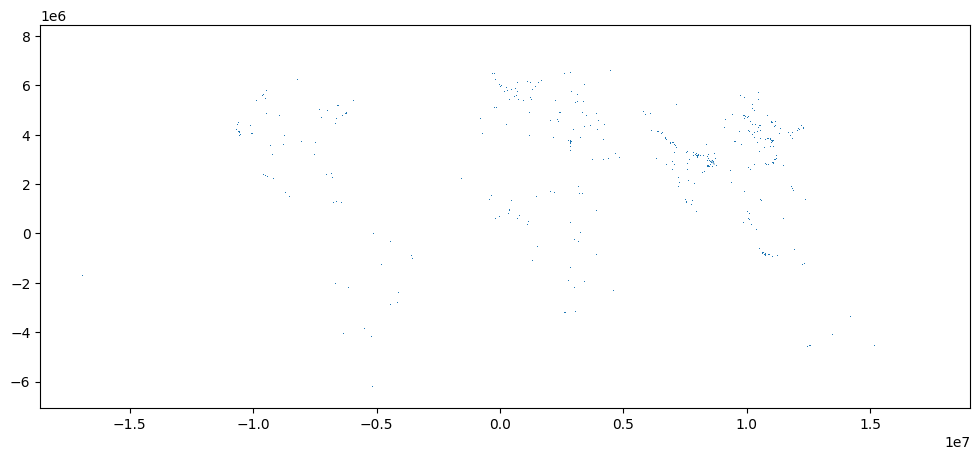

In [31]:
#very simple mapping of features
gdf.plot()

🌍 Creating global visualization...
   Using sample of 100 cities for visualization


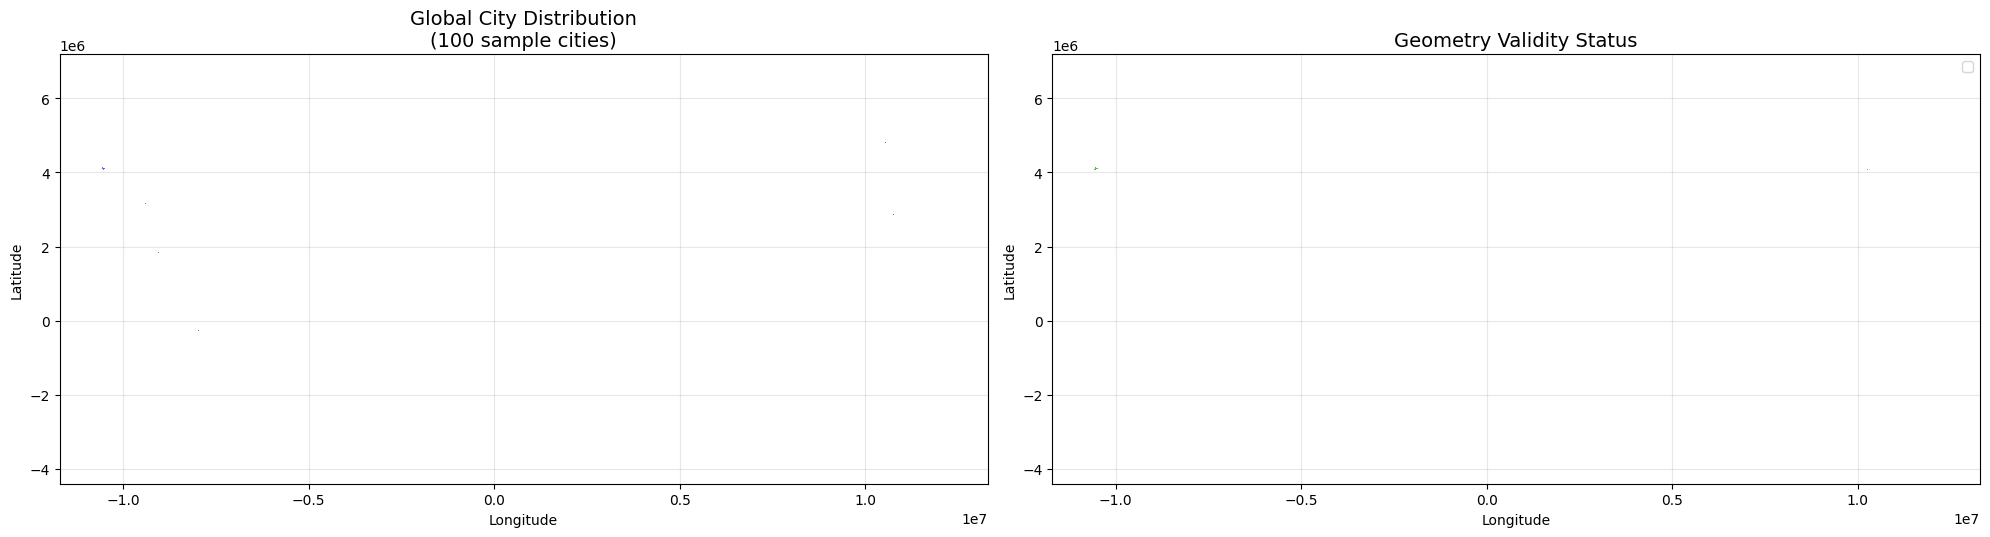

✅ Global visualization complete


In [28]:
if gdf is not None:
    print("🌍 Creating global visualization...")
    
    try:
        # Create a sample for visualization (plotting all cities would be too slow)
        sample_size = min(100, len(gdf))  # Max 10k points for speed
        gdf_sample = gdf.sample(n=sample_size, random_state=42)
        
        print(f"   Using sample of {len(gdf_sample):,} cities for visualization")
        
        # Create world plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Plot 1: All cities
        gdf_sample.plot(ax=ax1, markersize=0.5, alpha=0.6, color='blue')
        ax1.set_title(f'Global City Distribution\n({len(gdf_sample):,} sample cities)', fontsize=14)
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Validity status
        valid_sample = gdf_sample[gdf_sample.geometry.is_valid]
        invalid_sample = gdf_sample[~gdf_sample.geometry.is_valid]
        
        if len(valid_sample) > 0:
            valid_sample.plot(ax=ax2, markersize=0.5, alpha=0.6, color='green', label=f'Valid ({len(valid_sample)})')
        
        if len(invalid_sample) > 0:
            invalid_sample.plot(ax=ax2, markersize=2, alpha=0.8, color='red', label=f'Invalid ({len(invalid_sample)})')
        
        ax2.set_title('Geometry Validity Status', fontsize=14)
        ax2.set_xlabel('Longitude')
        ax2.set_ylabel('Latitude')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Global visualization complete")
        
    except Exception as e:
        print(f"❌ Error creating global visualization: {e}")
        
else:
    print("❌ Cannot create visualization - shapefile not loaded")

## 6. Focus on Brazil - Detailed Visualization

In [7]:
if gdf is not None and 'brazil_gdf' in locals() and len(brazil_gdf) > 0:
    print("🇧🇷 Creating detailed Brazil visualization...")
    
    try:
        # Create Brazil-focused plot
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
        
        # Plot 1: All Brazilian cities
        brazil_gdf.plot(ax=ax1, markersize=2, alpha=0.7, color='blue')
        ax1.set_title(f'All Brazilian Cities ({len(brazil_gdf):,})', fontsize=12)
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Validity status
        brazil_valid = brazil_gdf[brazil_gdf.geometry.is_valid]
        brazil_invalid = brazil_gdf[~brazil_gdf.geometry.is_valid]
        
        if len(brazil_valid) > 0:
            brazil_valid.plot(ax=ax2, markersize=2, alpha=0.7, color='green', label=f'Valid ({len(brazil_valid)})')
        if len(brazil_invalid) > 0:
            brazil_invalid.plot(ax=ax2, markersize=4, alpha=0.9, color='red', label=f'Invalid ({len(brazil_invalid)})')
        
        ax2.set_title('Brazilian Cities - Geometry Validity', fontsize=12)
        ax2.set_xlabel('Longitude')
        ax2.set_ylabel('Latitude')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        
        # Plot 3: Population size
        if 'GC_POP_TOT_2025' in brazil_gdf.columns:
            # Remove cities with no population data
            brazil_pop = brazil_gdf[brazil_gdf['GC_POP_TOT_2025'].notna() & (brazil_gdf['GC_POP_TOT_2025'] > 0)]
            
            if len(brazil_pop) > 0:
                brazil_pop.plot(ax=ax3, 
                               markersize=brazil_pop['GC_POP_TOT_2025'] / 100000,  # Scale by population
                               alpha=0.6, 
                               c=brazil_pop['GC_POP_TOT_2025'], 
                               cmap='YlOrRd',
                               legend=True)
                ax3.set_title(f'Brazilian Cities by Population ({len(brazil_pop)} with data)', fontsize=12)
            else:
                ax3.text(0.5, 0.5, 'No population data available', 
                        transform=ax3.transAxes, ha='center', va='center')
                ax3.set_title('Brazilian Cities by Population', fontsize=12)
        else:
            ax3.text(0.5, 0.5, 'Population column not found', 
                    transform=ax3.transAxes, ha='center', va='center')
            ax3.set_title('Brazilian Cities by Population', fontsize=12)
        
        ax3.set_xlabel('Longitude')
        ax3.set_ylabel('Latitude')
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: Area size
        if 'GC_UCA_KM2_2025' in brazil_gdf.columns:
            brazil_area = brazil_gdf[brazil_gdf['GC_UCA_KM2_2025'].notna() & (brazil_gdf['GC_UCA_KM2_2025'] > 0)]
            
            if len(brazil_area) > 0:
                brazil_area.plot(ax=ax4,
                                markersize=np.sqrt(brazil_area['GC_UCA_KM2_2025']) / 10,  # Scale by area
                                alpha=0.6,
                                c=brazil_area['GC_UCA_KM2_2025'],
                                cmap='Blues',
                                legend=True)
                ax4.set_title(f'Brazilian Cities by Area ({len(brazil_area)} with data)', fontsize=12)
            else:
                ax4.text(0.5, 0.5, 'No area data available', 
                        transform=ax4.transAxes, ha='center', va='center')
                ax4.set_title('Brazilian Cities by Area', fontsize=12)
        else:
            ax4.text(0.5, 0.5, 'Area column not found', 
                    transform=ax4.transAxes, ha='center', va='center')
            ax4.set_title('Brazilian Cities by Area', fontsize=12)
        
        ax4.set_xlabel('Longitude')
        ax4.set_ylabel('Latitude')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Brazil detailed visualization complete")
        
    except Exception as e:
        print(f"❌ Error creating Brazil visualization: {e}")
        import traceback
        traceback.print_exc()
        
else:
    print("❌ Cannot create Brazil visualization - no Brazilian cities found")

❌ Cannot create Brazil visualization - no Brazilian cities found


## 7. Interactive Map of Brazilian Cities

In [8]:
if gdf is not None and 'brazil_gdf' in locals() and len(brazil_gdf) > 0:
    print("🗺️ Creating interactive map of Brazilian cities...")
    
    try:
        # Create map centered on Brazil
        brazil_center = [-14.2350, -51.9253]
        m = folium.Map(location=brazil_center, zoom_start=4)
        
        # Add Brazilian cities to map (limit to reasonable number for performance)
        brazil_sample = brazil_gdf.head(100)  # First 100 cities
        
        valid_count = 0
        invalid_count = 0
        
        for idx, city in brazil_sample.iterrows():
            try:
                if city.geometry and city.geometry.is_valid and not city.geometry.is_empty:
                    # Get centroid
                    centroid = city.geometry.centroid
                    
                    # Get city info
                    name = city.get('GC_UCN_MAI_2025', 'Unknown')
                    pop = city.get('GC_POP_TOT_2025', 'N/A')
                    area = city.get('GC_UCA_KM2_2025', 'N/A')
                    
                    # Format popup text
                    popup_text = f"""
                    <b>{name}</b><br>
                    Population: {pop:,.0f} people<br>
                    Area: {area:.1f} km²<br>
                    Coordinates: ({centroid.y:.4f}, {centroid.x:.4f})
                    """ if isinstance(pop, (int, float)) and isinstance(area, (int, float)) else f"""
                    <b>{name}</b><br>
                    Population: {pop}<br>
                    Area: {area}<br>
                    Coordinates: ({centroid.y:.4f}, {centroid.x:.4f})
                    """
                    
                    # Add marker
                    folium.Marker(
                        [centroid.y, centroid.x],
                        popup=folium.Popup(popup_text, max_width=300),
                        tooltip=name,
                        icon=folium.Icon(color='green', icon='info-sign')
                    ).add_to(m)
                    
                    valid_count += 1
                    
                else:
                    # Invalid geometry - add red marker at approximate location if possible
                    name = city.get('GC_UCN_MAI_2025', 'Unknown')
                    
                    # Try to get some coordinate info from bounds or other means
                    if city.geometry and not city.geometry.is_empty:
                        try:
                            bounds = city.geometry.bounds
                            center_lat = (bounds[1] + bounds[3]) / 2
                            center_lon = (bounds[0] + bounds[2]) / 2
                            
                            folium.Marker(
                                [center_lat, center_lon],
                                popup=f"<b>{name}</b><br>❌ Invalid geometry",
                                tooltip=f"{name} (Invalid)",
                                icon=folium.Icon(color='red', icon='exclamation-sign')
                            ).add_to(m)
                            
                        except:
                            pass  # Skip if can't get any coordinates
                    
                    invalid_count += 1
                    
            except Exception as e:
                print(f"   ⚠️ Error processing city {idx}: {e}")
                invalid_count += 1
        
        # Add legend
        legend_html = f"""
        <div style="position: fixed; 
                    bottom: 50px; left: 50px; width: 200px; height: 80px; 
                    background-color: white; border:2px solid grey; z-index:9999; 
                    font-size:14px; padding: 10px">
        <p><b>Brazilian Cities Sample</b></p>
        <p><i class="fa fa-map-marker" style="color:green"></i> Valid geometry ({valid_count})</p>
        <p><i class="fa fa-map-marker" style="color:red"></i> Invalid geometry ({invalid_count})</p>
        </div>
        """
        m.get_root().html.add_child(folium.Element(legend_html))
        
        print(f"✅ Interactive map created:")
        print(f"   🟢 Valid geometries plotted: {valid_count}")
        print(f"   🔴 Invalid geometries: {invalid_count}")
        print(f"   📊 Total sample: {valid_count + invalid_count}")
        
        # Display the map
        display(m)
        
    except Exception as e:
        print(f"❌ Error creating interactive map: {e}")
        import traceback
        traceback.print_exc()
        
else:
    print("❌ Cannot create interactive map - no Brazilian cities found")

❌ Cannot create interactive map - no Brazilian cities found


## 8. Geometry Analysis Summary

In [9]:
if gdf is not None:
    print("📊 GEOMETRY ANALYSIS SUMMARY")
    print("=" * 50)
    
    # Overall statistics
    total_features = len(gdf)
    valid_geoms = gdf.geometry.is_valid.sum()
    invalid_geoms = total_features - valid_geoms
    empty_geoms = gdf.geometry.is_empty.sum()
    null_geoms = gdf.geometry.isna().sum()
    
    print(f"\n🌍 GLOBAL DATASET:")
    print(f"   Total features: {total_features:,}")
    print(f"   Valid geometries: {valid_geoms:,} ({valid_geoms/total_features*100:.1f}%)")
    print(f"   Invalid geometries: {invalid_geoms:,} ({invalid_geoms/total_features*100:.1f}%)")
    print(f"   Empty geometries: {empty_geoms:,} ({empty_geoms/total_features*100:.1f}%)")
    print(f"   Null geometries: {null_geoms:,} ({null_geoms/total_features*100:.1f}%)")
    
    # Brazilian cities statistics
    if 'brazil_gdf' in locals() and len(brazil_gdf) > 0:
        brazil_total = len(brazil_gdf)
        brazil_valid = brazil_gdf.geometry.is_valid.sum()
        brazil_invalid = brazil_total - brazil_valid
        brazil_empty = brazil_gdf.geometry.is_empty.sum()
        
        print(f"\n🇧🇷 BRAZILIAN CITIES:")
        print(f"   Total features: {brazil_total:,}")
        print(f"   Valid geometries: {brazil_valid:,} ({brazil_valid/brazil_total*100:.1f}%)")
        print(f"   Invalid geometries: {brazil_invalid:,} ({brazil_invalid/brazil_total*100:.1f}%)")
        print(f"   Empty geometries: {brazil_empty:,} ({brazil_empty/brazil_total*100:.1f}%)")
    
    # Recommendations
    print(f"\n🎯 RECOMMENDATIONS:")
    
    if invalid_geoms == 0 and empty_geoms == 0 and null_geoms == 0:
        print(f"   ✅ All geometries are valid! Safe to upload to GEE as-is.")
    else:
        print(f"   ⚠️ Geometry issues found that need fixing:")
        
        if invalid_geoms > 0:
            print(f"     - Fix {invalid_geoms:,} invalid geometries (try buffer(0) or make_valid())")
        
        if empty_geoms > 0:
            print(f"     - Remove {empty_geoms:,} empty geometries")
        
        if null_geoms > 0:
            print(f"     - Remove {null_geoms:,} null geometries")
        
        clean_count = total_features - invalid_geoms - empty_geoms - null_geoms
        print(f"     - Clean dataset would have {clean_count:,} features ({clean_count/total_features*100:.1f}% of original)")
    
    # Next steps
    print(f"\n🔄 NEXT STEPS:")
    print(f"   1. Run geometry cleaning process")
    print(f"   2. Create cleaned version for GEE upload")
    print(f"   3. Upload to GEE as new asset")
    print(f"   4. Test coordinate extraction with new asset")
    print(f"   5. Update main analysis notebook to use new asset")
    
else:
    print("❌ No geometry analysis available - shapefile not loaded")

📊 GEOMETRY ANALYSIS SUMMARY

🌍 GLOBAL DATASET:
   Total features: 11,422
   Valid geometries: 11,400 (99.8%)
   Invalid geometries: 22 (0.2%)
   Empty geometries: 0 (0.0%)
   Null geometries: 0 (0.0%)

🎯 RECOMMENDATIONS:
   ⚠️ Geometry issues found that need fixing:
     - Fix 22 invalid geometries (try buffer(0) or make_valid())
     - Clean dataset would have 11,400 features (99.8% of original)

🔄 NEXT STEPS:
   1. Run geometry cleaning process
   2. Create cleaned version for GEE upload
   3. Upload to GEE as new asset
   4. Test coordinate extraction with new asset
   5. Update main analysis notebook to use new asset


## 9. Create Clean Dataset for GEE Upload

In [ ]:
if gdf is not None:
    print("🧹 Creating clean dataset for GEE upload...")
    
    try:
        # Start with a copy
        clean_gdf = gdf.copy()
        original_count = len(clean_gdf)
        
        print(f"   Starting with {original_count:,} features")
        
        # Remove null geometries
        clean_gdf = clean_gdf[clean_gdf.geometry.notna()]
        after_null = len(clean_gdf)
        print(f"   After removing null geometries: {after_null:,} ({original_count - after_null} removed)")
        
        # Remove empty geometries
        clean_gdf = clean_gdf[~clean_gdf.geometry.is_empty]
        after_empty = len(clean_gdf)
        print(f"   After removing empty geometries: {after_empty:,} ({after_null - after_empty} removed)")
        
        # Fix invalid geometries
        invalid_mask = ~clean_gdf.geometry.is_valid
        invalid_count = invalid_mask.sum()
        
        if invalid_count > 0:
            print(f"   Fixing {invalid_count:,} invalid geometries...")
            
            # Try to fix with buffer(0) - common fix for topology issues
            try:
                clean_gdf.loc[invalid_mask, 'geometry'] = clean_gdf.loc[invalid_mask, 'geometry'].buffer(0)
                
                # Check how many are now valid
                still_invalid = ~clean_gdf.geometry.is_valid
                still_invalid_count = still_invalid.sum()
                fixed_count = invalid_count - still_invalid_count
                
                print(f"     Fixed {fixed_count:,} geometries with buffer(0)")
                
                if still_invalid_count > 0:
                    print(f"     Removing {still_invalid_count:,} still-invalid geometries")
                    clean_gdf = clean_gdf[clean_gdf.geometry.is_valid]
                    
            except Exception as e:
                print(f"     Error fixing geometries, removing invalid ones: {e}")
                clean_gdf = clean_gdf[clean_gdf.geometry.is_valid]
        
        after_valid = len(clean_gdf)
        print(f"   After geometry validation: {after_valid:,}")
        
        # Ensure CRS is WGS84 for GEE
        if clean_gdf.crs != 'EPSG:4326':
            print(f"   Converting CRS from {clean_gdf.crs} to EPSG:4326")
            clean_gdf = clean_gdf.to_crs('EPSG:4326')
        else:
            print(f"   ✅ CRS is already WGS84")
        
        # Clean column names for GEE compatibility
        print(f"   Cleaning column names for GEE...")
        
        # Keep only essential columns to reduce file size
        essential_columns = [
            'GC_UCN_MAI_2025',  # City name
            'GC_CNT_GAD_2025',  # Country
            'GC_POP_TOT_2025',  # Population
            'GC_UCA_KM2_2025',  # Area
            'GC_DEV_WIG_2025',  # Development level
            'GC_DEV_USR_2025',  # Development region
            'geometry'          # Geometry (always keep)
        ]
        
        # Keep only columns that exist
        available_columns = [col for col in essential_columns if col in clean_gdf.columns]
        clean_gdf = clean_gdf[available_columns]
        
        print(f"   Kept {len(available_columns)} essential columns: {available_columns}")
        
        # Save cleaned version
        output_dir = "/Users/martynclark/heatInsights-notebooks/data"
        os.makedirs(output_dir, exist_ok=True)
        
        # Save as both shapefile and GeoJSON
        shp_path = os.path.join(output_dir, "GHS_UCDB_cleaned.shp")
        geojson_path = os.path.join(output_dir, "GHS_UCDB_cleaned.geojson")
        
        clean_gdf.to_file(shp_path)
        clean_gdf.to_file(geojson_path, driver='GeoJSON')
        
        # Check file sizes
        shp_size = os.path.getsize(shp_path) / (1024 * 1024)
        geojson_size = os.path.getsize(geojson_path) / (1024 * 1024)
        
        print(f"\n✅ Clean dataset created successfully!")
        print(f"   📊 Final feature count: {len(clean_gdf):,} ({len(clean_gdf)/original_count*100:.1f}% of original)")
        print(f"   📁 Shapefile: {shp_path} ({shp_size:.1f} MB)")
        print(f"   📁 GeoJSON: {geojson_path} ({geojson_size:.1f} MB)")
        
        # Test a few Brazilian cities in the clean dataset
        if 'GC_CNT_GAD_2025' in clean_gdf.columns:
            clean_brazil = clean_gdf[clean_gdf['GC_CNT_GAD_2025'] == 'Brazil']
            print(f"   🇧🇷 Brazilian cities in clean dataset: {len(clean_brazil):,}")
            
            if len(clean_brazil) > 0:
                print(f"   🧪 Testing coordinate extraction from clean data:")
                
                for i, (_, city) in enumerate(clean_brazil.head(3).iterrows()):
                    name = city.get('GC_UCN_MAI_2025', 'Unknown')
                    centroid = city.geometry.centroid
                    print(f"     {i+1}. {name}: ({centroid.y:.4f}, {centroid.x:.4f})")
        
    except Exception as e:
        print(f"❌ Error creating clean dataset: {e}")
        import traceback
        traceback.print_exc()
        
else:
    print("❌ Cannot create clean dataset - shapefile not loaded")